In [1]:
%load_ext autoreload
import logging as log
import tsplib95
from functools import partial
%autoreload 2
from utils import get_tsp_files_available, find_solution, pivot_and_plot
from cp_SAT import solve_OrTools
from fourmil import ACO
from tqdm import tqdm
import pandas as pd
from TSP_OR import incompletOR
from ortools.sat.python import cp_model



# Approche complète

## modification du modèle

Dans cette partie nous comparons plusieurs versions des contraintes sur les 10 plus petites instances

In [2]:

solvers = {
    "complete" : partial(solve_OrTools, enforce= False),
    "complete_sup" : partial(solve_OrTools, supplementary_constraint = True, enforce= False),
    "complete_enf" : partial(solve_OrTools, supplementary_constraint = False),
}
for problem in get_tsp_files_available("TSP_Instances", 10):
    for i in tqdm(range(10)):
        find_solution(problem, solvers, solution_save_file="test_complet.csv", verbose= False)

100%|██████████| 10/10 [00:33<00:00,  3.32s/it]


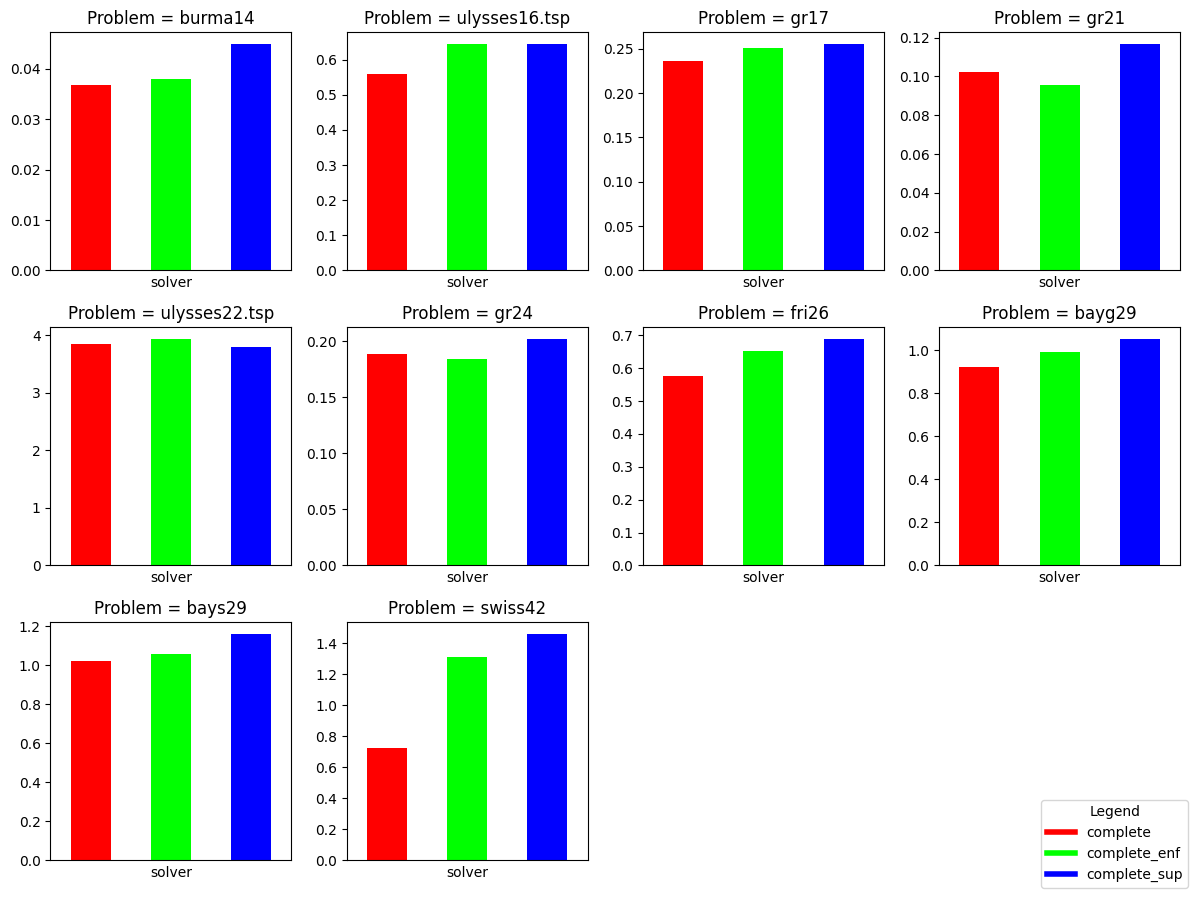

In [3]:
df = pd.read_csv("test_complet.csv").drop("status", axis = 1)
pivot_and_plot(df)

## Modification de la stratégie par défaut

Dans cette partie on compare la stratégie par défaut de CP-SAT avec deux version d'indication de stratégie.

In [4]:
solvers = {
    "complete" : solve_OrTools,
    "complete_strategy" : partial(solve_OrTools, strategies= [[cp_model.CHOOSE_MIN_DOMAIN_SIZE, cp_model.SELECT_MIN_VALUE], [cp_model.CHOOSE_MIN_DOMAIN_SIZE, cp_model.SELECT_MAX_VALUE]]),
    "enforce_strategy" : partial(solve_OrTools, strategies= [[cp_model.CHOOSE_MIN_DOMAIN_SIZE, cp_model.SELECT_MIN_VALUE], [cp_model.CHOOSE_MIN_DOMAIN_SIZE, cp_model.SELECT_MAX_VALUE]], force_strategy = True),
}
for problem in get_tsp_files_available("TSP_Instances", 10):
    for i in tqdm(range(20)):
        find_solution(problem, solvers, solution_save_file="test_strategy.csv", verbose= False)

100%|██████████| 20/20 [01:48<00:00,  5.41s/it]


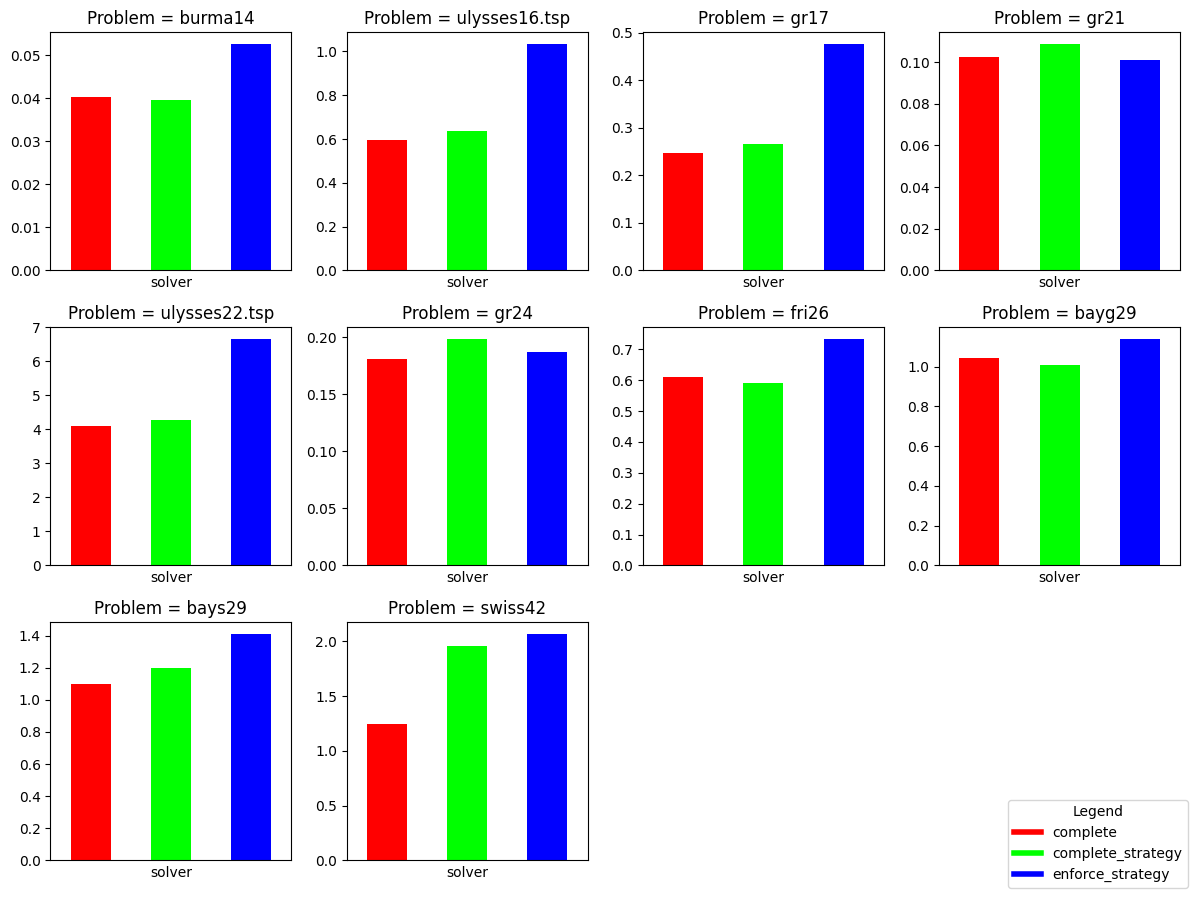

In [5]:
df = pd.read_csv("test_strategy.csv").drop("status", axis = 1)
pivot_and_plot(df)

# Approche Incomplète

In [6]:
solvers = {
    "fourmil" : ACO,
    "OR incomplete" : incompletOR
}

for problem in get_tsp_files_available("TSP_Instances", 10):
    for i in tqdm(range(20)):
        find_solution(problem, solvers, solution_save_file="test_incomplet.csv", verbose= False)


100%|██████████| 20/20 [00:50<00:00,  2.52s/it]


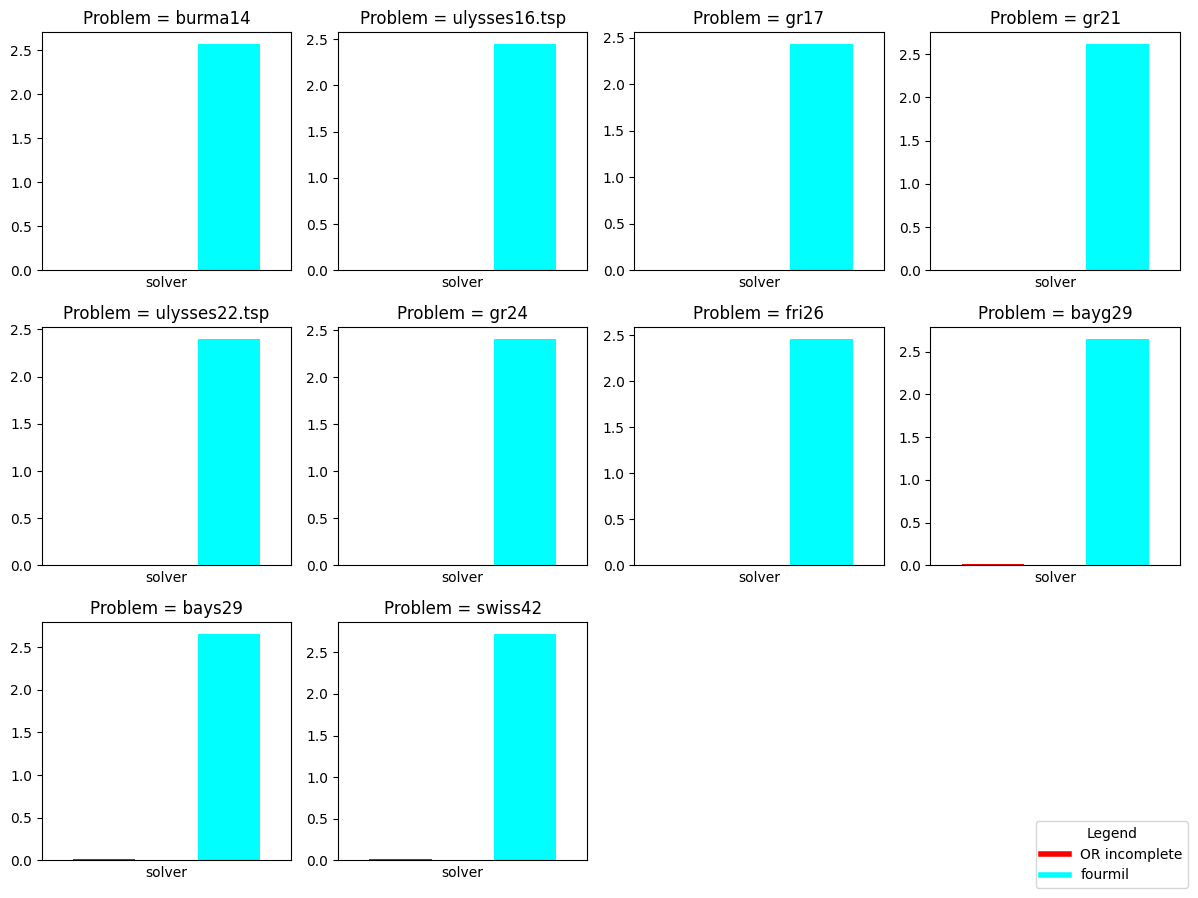

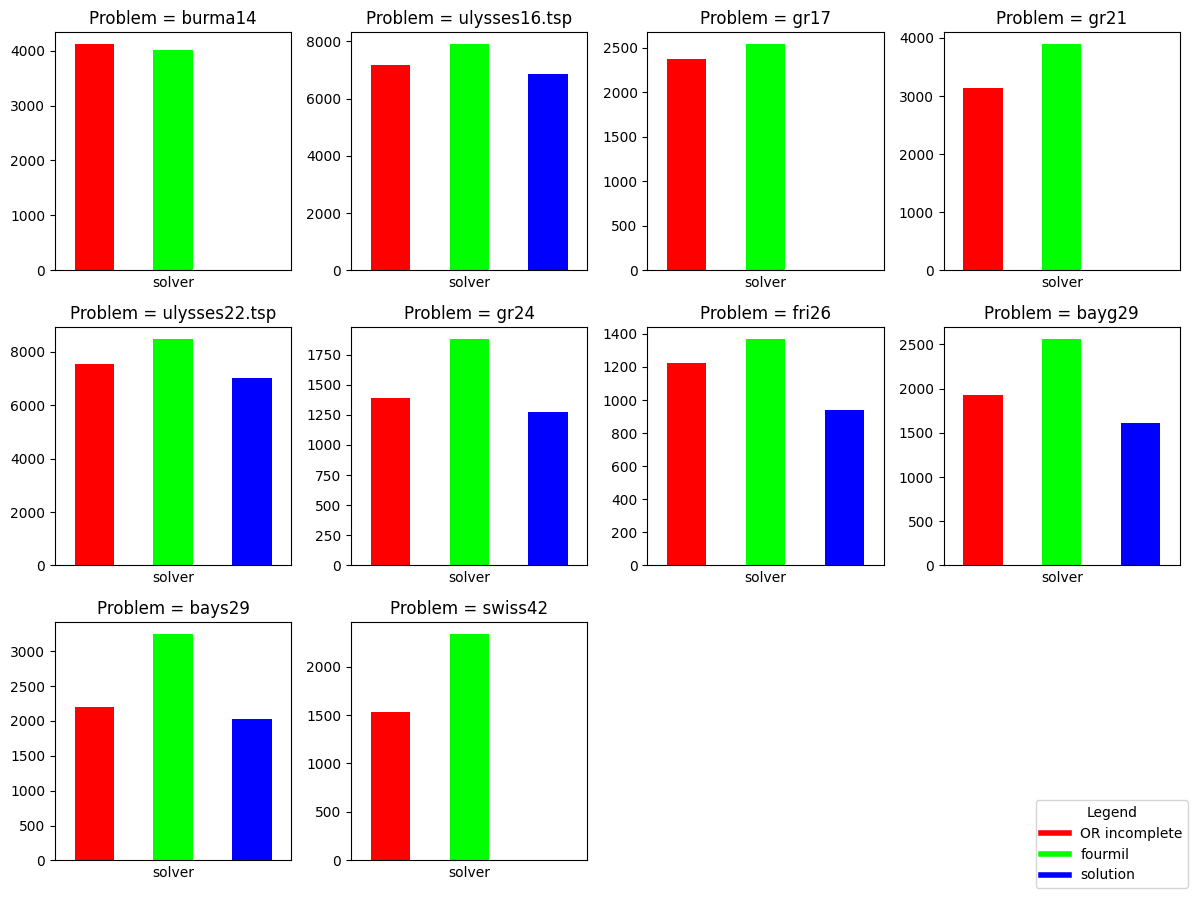

In [7]:

df = pd.read_csv("test_incomplet.csv").drop("status", axis = 1)
pivot_and_plot(df)
pivot_and_plot(df, value='len')

# Comparaison

2024-01-09 17:53:29 INFO     burma14
2024-01-09 17:53:29 INFO     complete
2024-01-09 17:53:29 INFO     complete DONE 
2024-01-09 17:53:29 INFO     complete_sup
2024-01-09 17:53:29 INFO     complete_sup DONE 
2024-01-09 17:53:29 INFO     complete_enf
2024-01-09 17:53:29 INFO     complete_enf DONE 
2024-01-09 17:53:29 INFO     inc_aco
2024-01-09 17:53:31 INFO     inc_aco DONE 
2024-01-09 17:53:31 INFO     complete_strategy
2024-01-09 17:53:32 INFO     complete_strategy DONE 
2024-01-09 17:53:32 INFO     enforce_strategy
2024-01-09 17:53:32 INFO     enforce_strategy DONE 
2024-01-09 17:53:32 INFO     OR_incomplete
2024-01-09 17:53:32 INFO     OR_incomplete DONE 


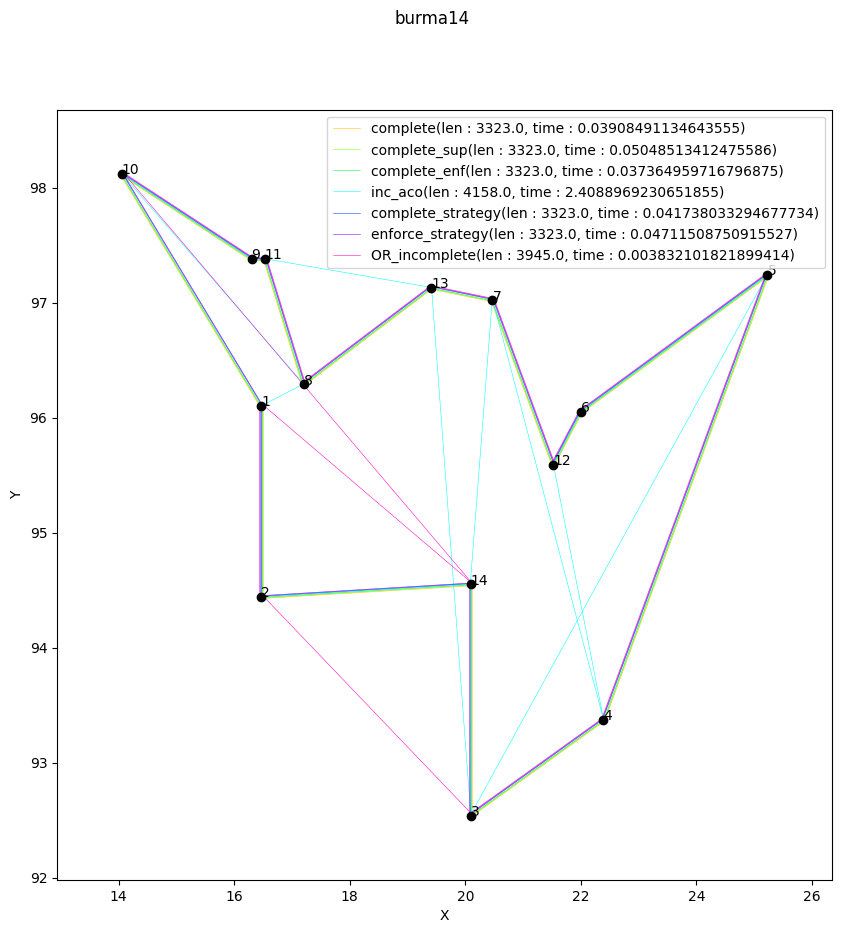

2024-01-09 17:53:32 INFO     ulysses16.tsp
2024-01-09 17:53:32 INFO     complete
2024-01-09 17:53:33 INFO     complete DONE 
2024-01-09 17:53:33 INFO     complete_sup
2024-01-09 17:53:33 INFO     complete_sup DONE 
2024-01-09 17:53:33 INFO     complete_enf
2024-01-09 17:53:34 INFO     complete_enf DONE 
2024-01-09 17:53:34 INFO     inc_aco
2024-01-09 17:53:37 INFO     inc_aco DONE 
2024-01-09 17:53:37 INFO     complete_strategy
2024-01-09 17:53:38 INFO     complete_strategy DONE 
2024-01-09 17:53:38 INFO     enforce_strategy
2024-01-09 17:53:39 INFO     enforce_strategy DONE 
2024-01-09 17:53:39 INFO     OR_incomplete
2024-01-09 17:53:39 INFO     OR_incomplete DONE 


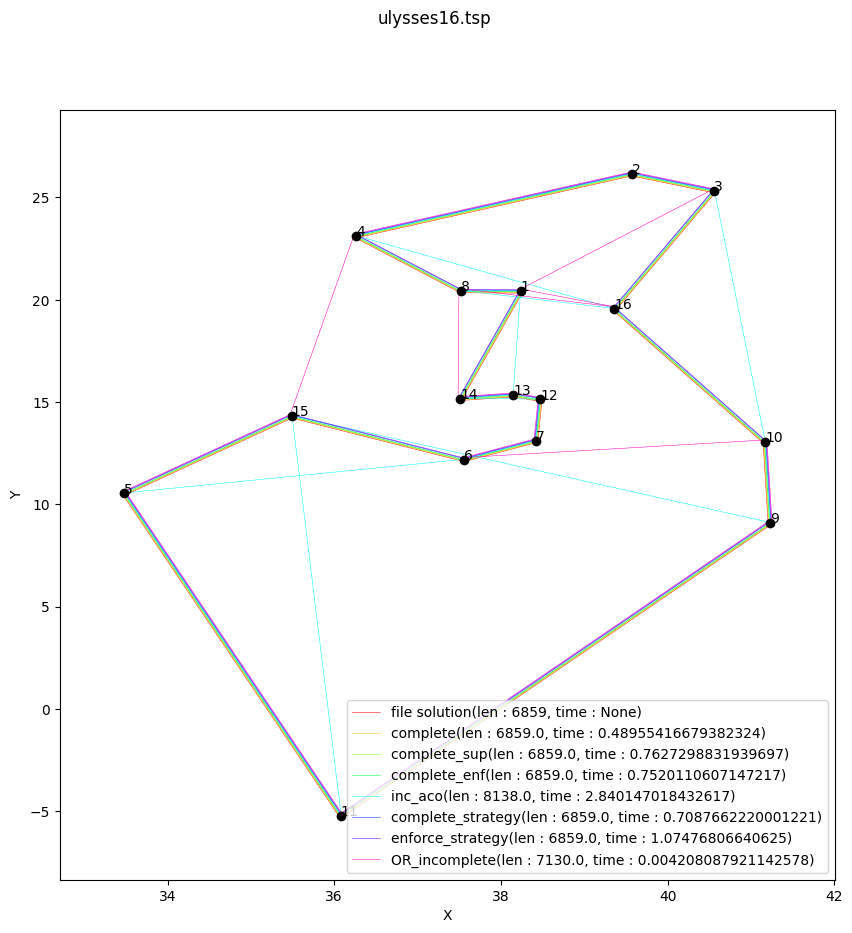

2024-01-09 17:53:39 INFO     gr17
2024-01-09 17:53:39 INFO     complete
2024-01-09 17:53:40 INFO     complete DONE 
2024-01-09 17:53:40 INFO     complete_sup
2024-01-09 17:53:40 INFO     complete_sup DONE 
2024-01-09 17:53:40 INFO     complete_enf
2024-01-09 17:53:40 INFO     complete_enf DONE 
2024-01-09 17:53:40 INFO     inc_aco
2024-01-09 17:53:43 INFO     inc_aco DONE 
2024-01-09 17:53:43 INFO     complete_strategy
2024-01-09 17:53:43 INFO     complete_strategy DONE 
2024-01-09 17:53:43 INFO     enforce_strategy
2024-01-09 17:53:44 INFO     enforce_strategy DONE 
2024-01-09 17:53:44 INFO     OR_incomplete
2024-01-09 17:53:44 INFO     OR_incomplete DONE 


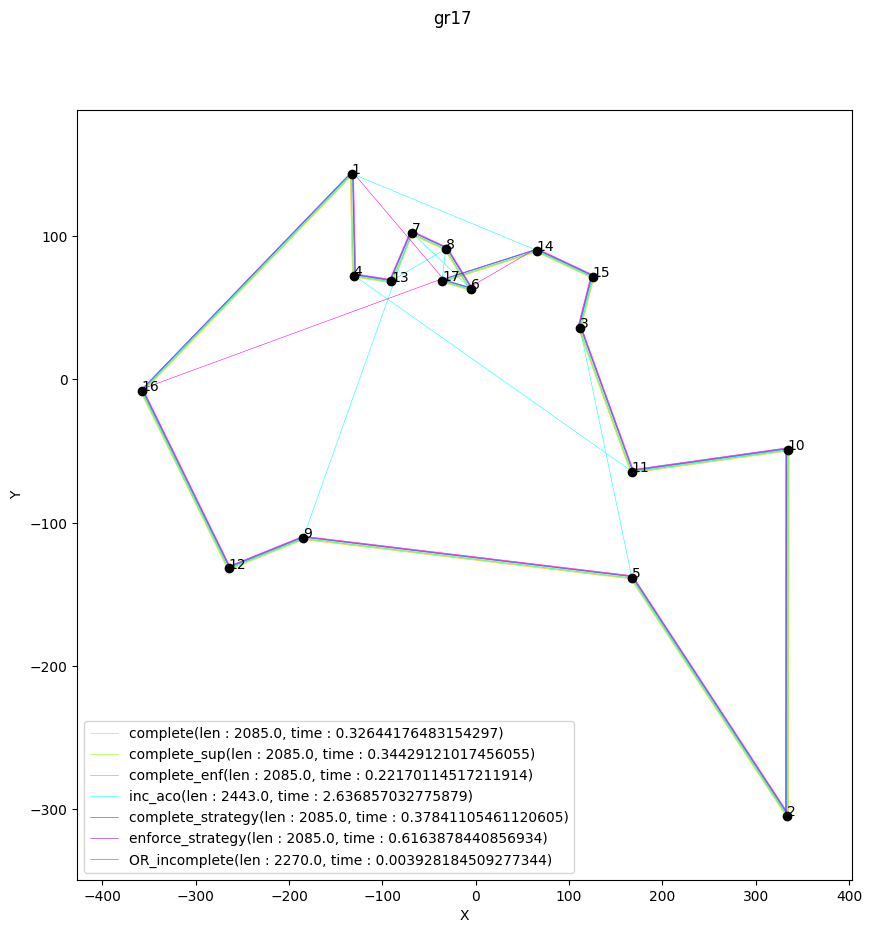

2024-01-09 17:53:44 INFO     gr21
2024-01-09 17:53:44 INFO     complete
2024-01-09 17:53:44 INFO     complete DONE 
2024-01-09 17:53:44 INFO     complete_sup
2024-01-09 17:53:45 INFO     complete_sup DONE 
2024-01-09 17:53:45 INFO     complete_enf
2024-01-09 17:53:45 INFO     complete_enf DONE 
2024-01-09 17:53:45 INFO     inc_aco
2024-01-09 17:53:47 INFO     inc_aco DONE 
2024-01-09 17:53:47 INFO     complete_strategy
2024-01-09 17:53:47 INFO     complete_strategy DONE 
2024-01-09 17:53:47 INFO     enforce_strategy
2024-01-09 17:53:47 INFO     enforce_strategy DONE 
2024-01-09 17:53:47 INFO     OR_incomplete
2024-01-09 17:53:47 INFO     OR_incomplete DONE 


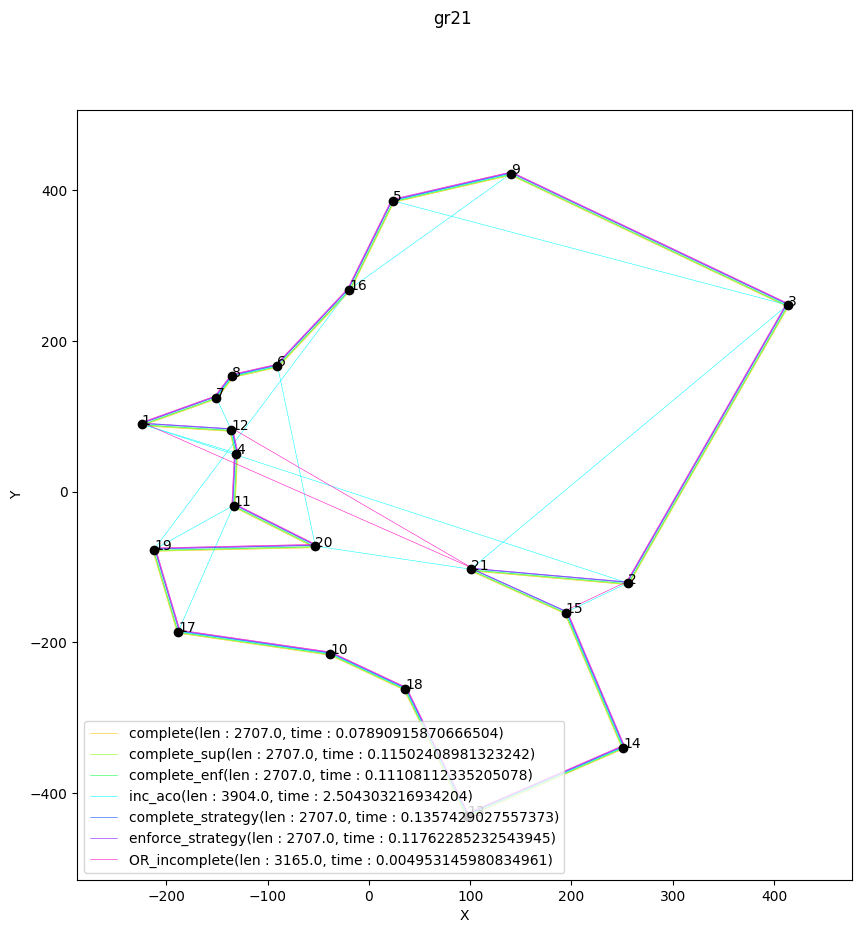

2024-01-09 17:53:48 INFO     ulysses22.tsp
2024-01-09 17:53:48 INFO     complete
2024-01-09 17:53:52 INFO     complete DONE 
2024-01-09 17:53:52 INFO     complete_sup
2024-01-09 17:53:57 INFO     complete_sup DONE 
2024-01-09 17:53:57 INFO     complete_enf
2024-01-09 17:54:01 INFO     complete_enf DONE 
2024-01-09 17:54:01 INFO     inc_aco
2024-01-09 17:54:04 INFO     inc_aco DONE 
2024-01-09 17:54:04 INFO     complete_strategy
2024-01-09 17:54:09 INFO     complete_strategy DONE 
2024-01-09 17:54:09 INFO     enforce_strategy
2024-01-09 17:54:14 INFO     enforce_strategy DONE 
2024-01-09 17:54:14 INFO     OR_incomplete
2024-01-09 17:54:14 INFO     OR_incomplete DONE 


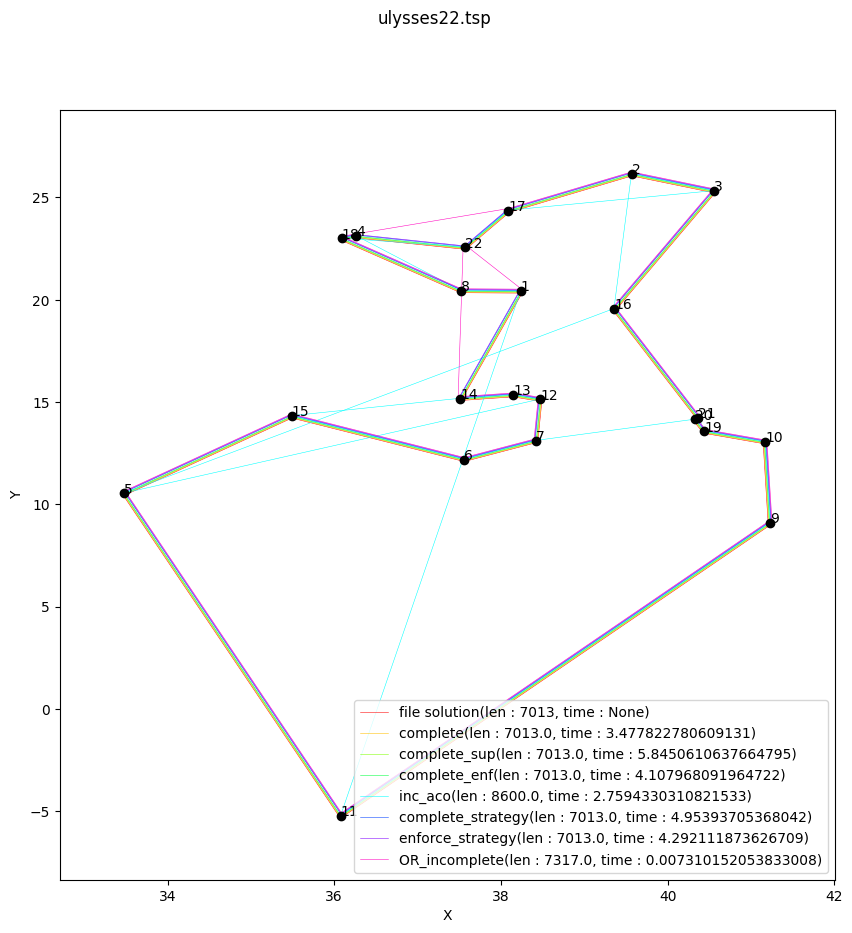

In [9]:
solvers = {
    "complete" : partial(solve_OrTools, enforce= False),
    "complete_sup" : partial(solve_OrTools, supplementary_constraint = True, enforce= False),
    "complete_enf" : solve_OrTools,
    "complete_strategy" : partial(solve_OrTools, strategies= [[cp_model.CHOOSE_MIN_DOMAIN_SIZE, cp_model.SELECT_MIN_VALUE], [cp_model.CHOOSE_MIN_DOMAIN_SIZE, cp_model.SELECT_MAX_VALUE]]),
    "enforce_strategy" : partial(solve_OrTools, strategies= [[cp_model.CHOOSE_MIN_DOMAIN_SIZE, cp_model.SELECT_MIN_VALUE], [cp_model.CHOOSE_MIN_DOMAIN_SIZE, cp_model.SELECT_MAX_VALUE]], force_strategy = True),
    "inc_aco" : ACO,
    "OR_incomplete" : incompletOR,
}

for problem in get_tsp_files_available("TSP_Instances", 5):
    find_solution(problem, solvers, solution_save_file="test_comparaison.csv")

In [10]:
for problem in get_tsp_files_available("TSP_Instances", 20):
    for i in tqdm(range(10)):
        find_solution(problem, solvers, solution_save_file="test_comparaison.csv", verbose= False)

100%|██████████| 10/10 [08:17<00:00, 49.72s/it]


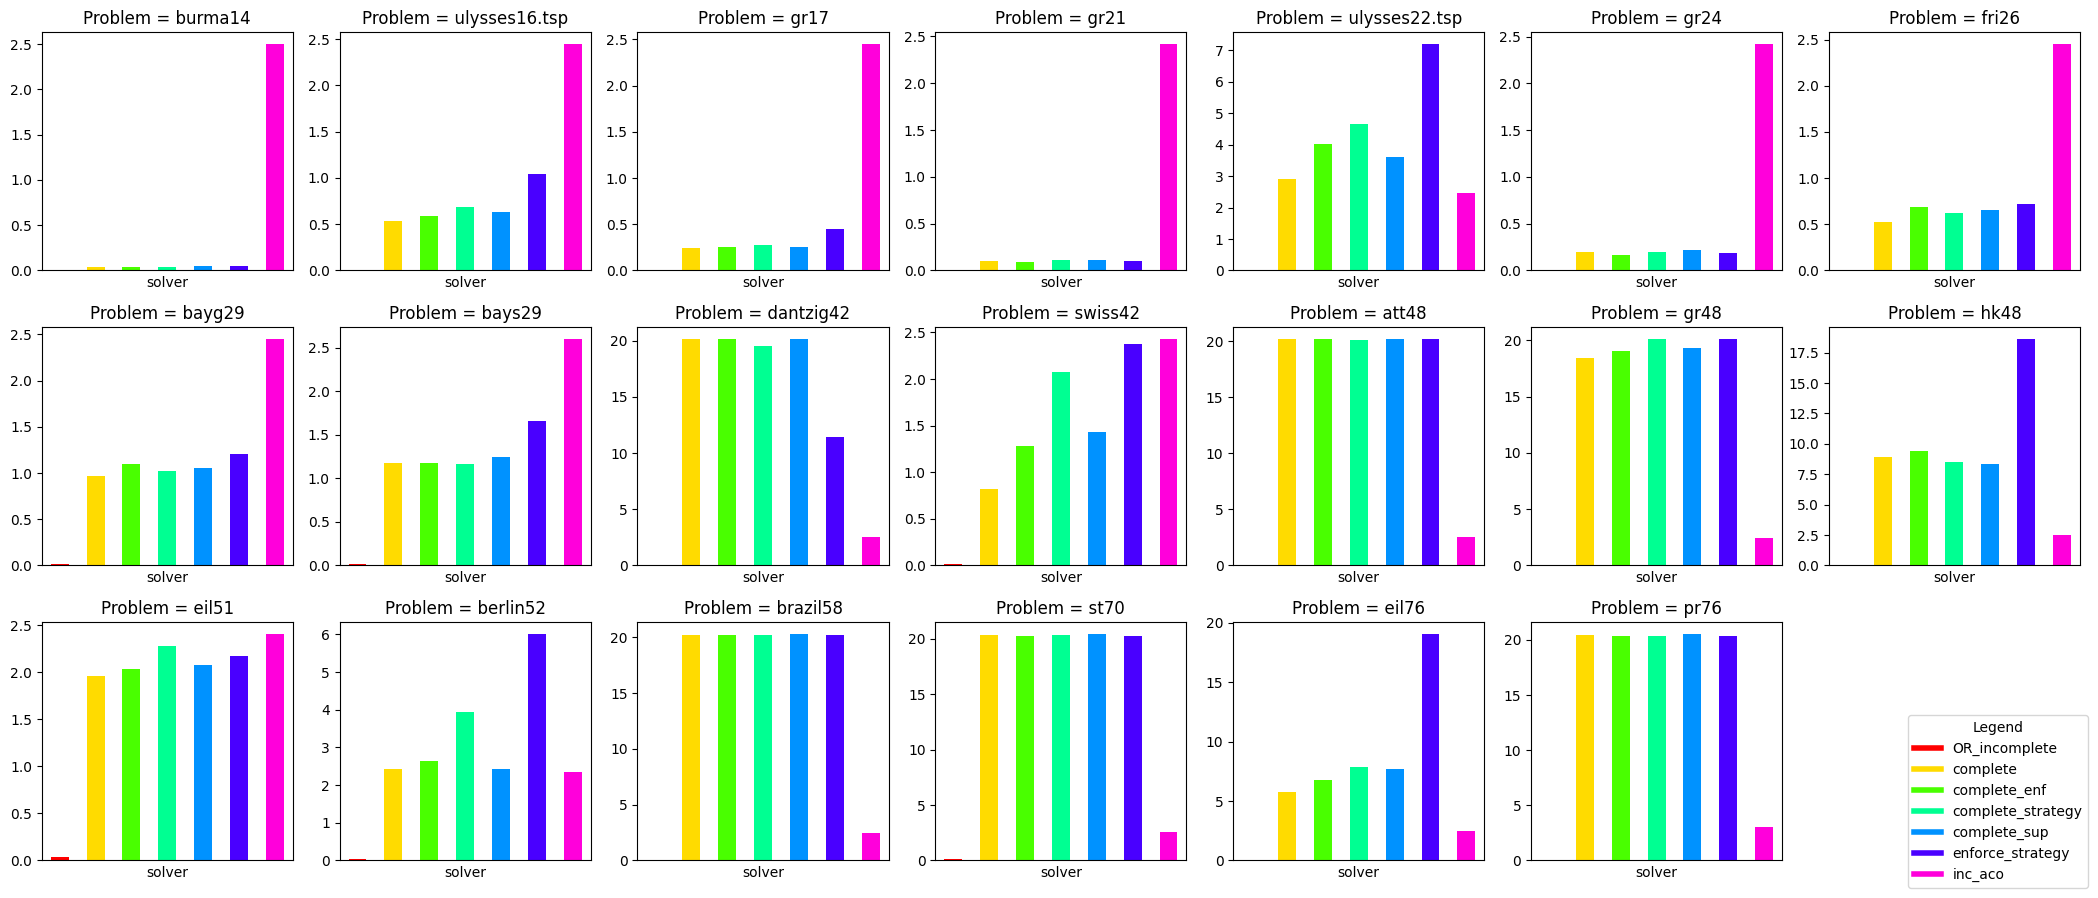

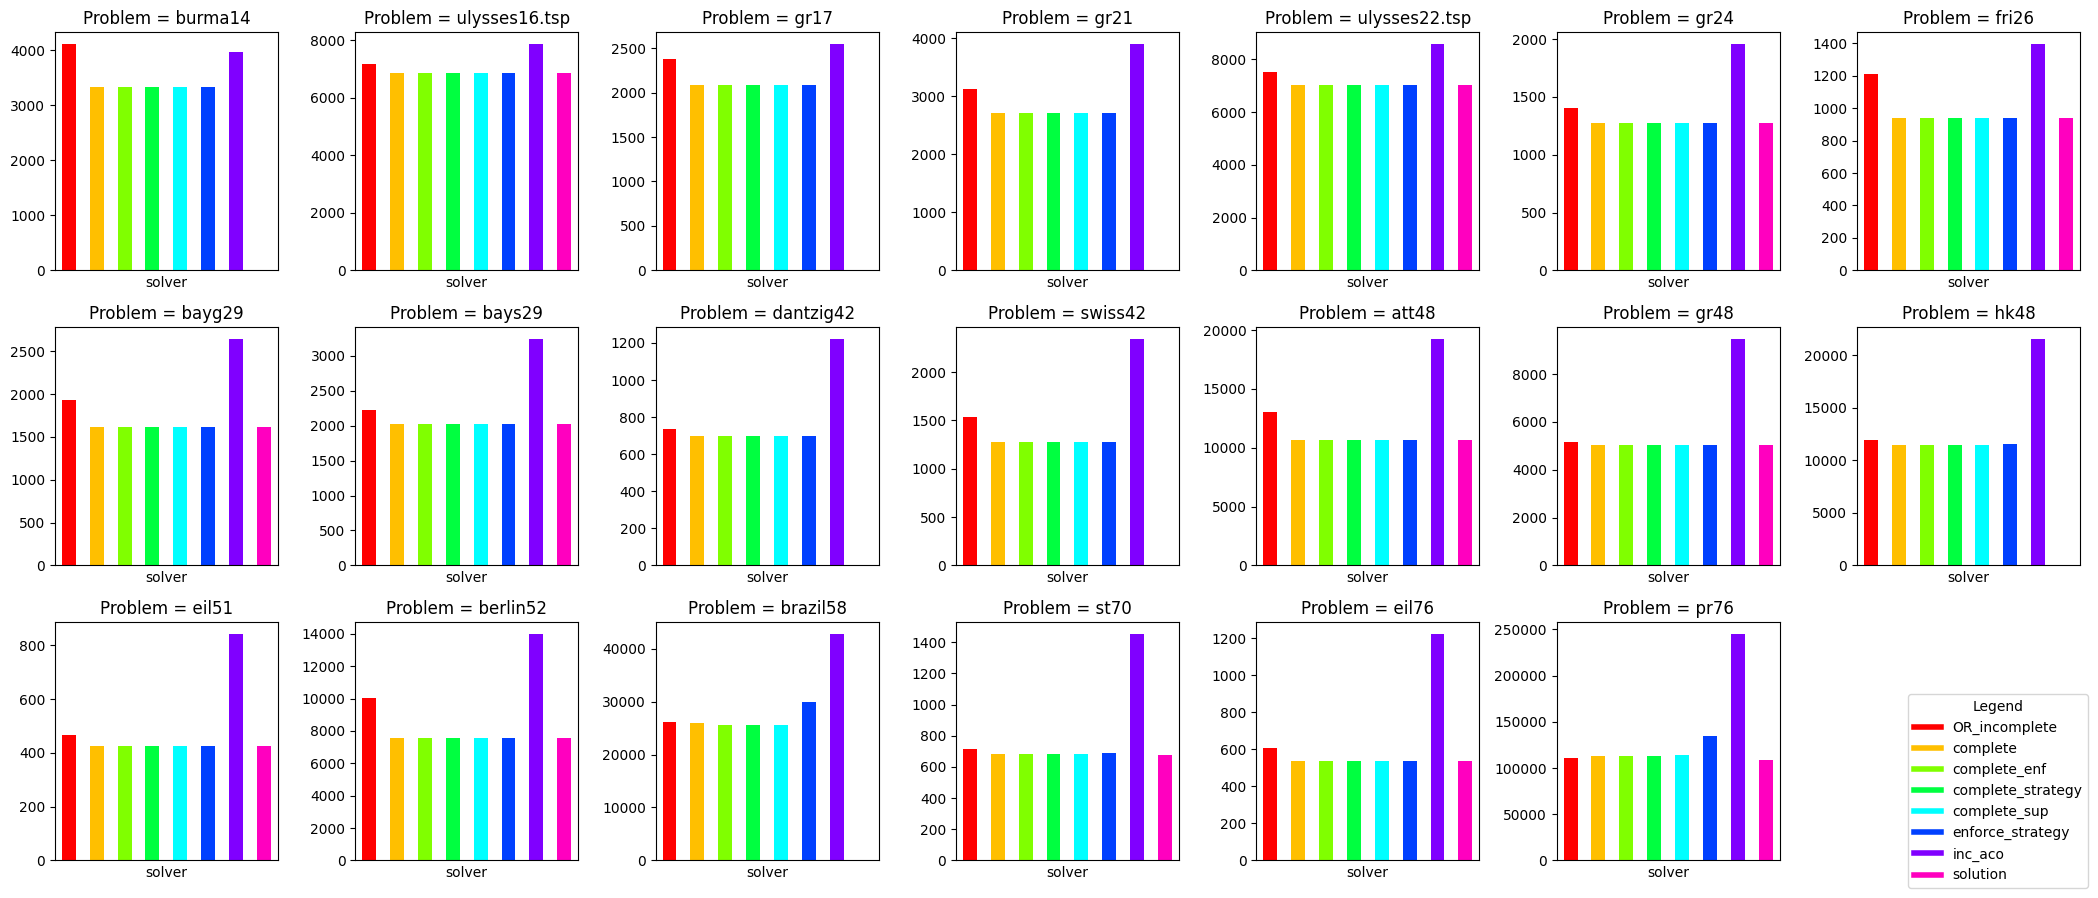

In [11]:
df = pd.read_csv("test_comparaison.csv").drop("status", axis = 1)
df = df[df["solver"] != "complete_sup_enf"]
pivot_and_plot(df, max_n=7)
pivot_and_plot(df, value='len', max_n = 7)